In [4]:
!pip install adjustText

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

(1453, 15)

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once 

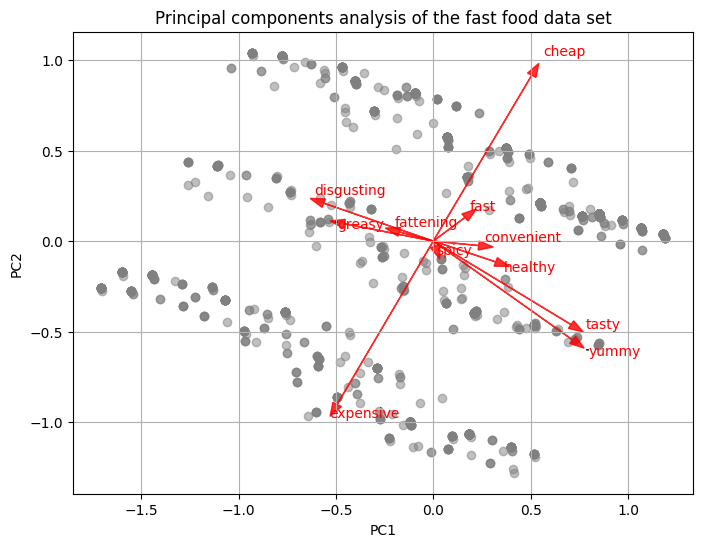

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from adjustText import adjust_text

df = pd.read_csv("/content/sample_data/mcdonalds.csv")

print(df.columns)
print()
print(df.shape)
print()
print(df.head())
print()


MD = np.array(df.iloc[:,:11].values)
MD = np.where(MD == "Yes",1,0)
Mean = np.round(MD.mean(axis=0), 2)
colMeans = pd.Series(Mean, index = df.columns[:11])
print(colMeans)

pca = PCA()
MD_pca =pca.fit_transform(MD)
sd = np.sqrt(pca.explained_variance_)
prop_var = pca.explained_variance_ratio_
cum_var = np.cumsum(prop_var)
d ={
    "Standard Deviation": np.round(sd, 4),
    "Proportion of Variance": np.round(prop_var, 4),
    "Cumulative Proportion": np.round(cum_var, 4)
}
components = [f"PC{i+1}" for i in range(len(prop_var))]
summary = pd.DataFrame(d, index=components)

print(summary)

std = np.round(np.sqrt(pca.explained_variance_),1)
print("Standard deviations (1, ..., p={})".format(len(prop_var)))
print(std)
rotation = np.round(pca.components_.T,3)
rotation_df = pd.DataFrame(rotation,
                           index = df.columns[:11],
                           columns = components)
print(rotation_df)


components = pca.components_.T
scale = 1.5
scaled_components = components * scale
plt.figure(figsize=(8,6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color="grey", alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Principal components analysis of the fast food data set")

texts=[]
mean = np.mean(MD,axis=0)
for i, feature in enumerate(df.columns[:11]):
    plt.arrow(0, 0, scaled_components[i, 0], scaled_components[i, 1], color='red', alpha=0.8, head_width=0.05)
    text = plt.text(scaled_components[i, 0] * 1.1, scaled_components[i, 1] * 1.1, feature, color='red', fontsize=10)
    texts.append(text)

adjust_text(texts, arrowprops=dict(arrowstyle="-", color="black"))


plt.grid()
plt.show()
